In [12]:
# load index file for all input data (secondary outputs)
# please note.. secondary outputs are stored directly by task (data doesn't have to be archived)
# so if you submitted multiple tasks for the same subject, there could be more than 1 output for 
# that subject. you will need to decide which one to use (sort by finish_date?)
import json
with open("input/index.json") as f:
    index = json.load(f) 
    
print("number of objects", len(index["objects"]))
print("dumping the list of objects")
for object in index["objects"]:
    print(object["meta"]["subject"], object["datatype"]["name"])
    
#you can examine the structure of index.json by opening it on another tab. it's under input/ directory.

number of objects 30
dumping the list of objects
07 neuro/parc-stats
11 neuro/parc-stats
11 neuro/freesurfer
02 neuro/parc-stats
06 neuro/parc-stats
09 neuro/parc-stats
04 neuro/parc-stats
13 neuro/parc-stats
08 neuro/parc-stats
01 neuro/parc-stats
05 neuro/parc-stats
10 neuro/parc-stats
08 neuro/freesurfer
12 neuro/parc-stats
03 neuro/parc-stats
15 neuro/parc-stats
14 neuro/parc-stats
03 neuro/freesurfer
05 neuro/freesurfer
10 neuro/freesurfer
02 neuro/freesurfer
01 neuro/freesurfer
09 neuro/freesurfer
15 neuro/freesurfer
12 neuro/freesurfer
04 neuro/freesurfer
06 neuro/freesurfer
13 neuro/freesurfer
14 neuro/freesurfer
delete neuro/anat/t1w


In [27]:
# participant information is also stored in the index.json
# TODO - I think I will move participants information out of index.json
for (subject, info) in index["participants"]["subjects"].items():
    print(info)


{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '24', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '1'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '20', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Non-gamer', 'ageAtFirstScanYears': '21', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '0'}
{'group': 'Gamer', 'ageAtFirstScanYears': '19', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPerweekInLastYear': '11'}
{'group': 'Gamer', 'ageAtFirstScanYears': '29', 'handedness': 'R', 'sex': 'F', 'EstimateOfHoursPlayingActionVideoGamesPer

In [64]:
# let's load parc-stats/rois.csv for all subjects.
# while at it, let's group them into gamer v.s non-gamer

import pandas

gamer_rois=[]
nongamer_rois=[]

for object in index["objects"]:
    if object["datatype"]["name"] == "neuro/parc-stats":
        subject=object["meta"]["subject"]
        csv = pandas.read_csv("input/"+object["path"]+"/rois.csv", index_col="subjectID")
        phenotype = index["participants"]["subjects"][subject]
        if phenotype["group"] == "Gamer":
            gamer_rois.append(csv)
        else:
            nongamer_rois.append(csv)
                        
#show a sample..
gamer_rois[0]

#convert to a single panda frame for each group
gamer_rois = pandas.concat(gamer_rois)
nongamer_rois = pandas.concat(nongamer_rois)

In [43]:
gamer_rois

,subjectID,actual_vol,BrainVol_proportion,centroid_x,centroid_y,centroid_z,medialBorder,lateralBorder,anteriorBorder,posteriorBorder,superiorBorder,inferiorBorder
ROI_name,,,,,,,,,,,,
ROI_2,6,226701,0.195792,-31.179206,82.497030,-5.403008,-3.402557,-68.402557,154.019211,5.019211,49.553909,-65.446091
ROI_4,6,5495,0.004746,-17.155242,88.177719,-10.343452,-6.402557,-35.402557,117.019211,43.019211,5.553909,-37.446091
ROI_5,6,58,0.000050,-35.695661,72.260590,-35.325401,-33.402557,-38.402557,79.019211,61.019211,-20.446091,-46.446091
ROI_7,6,14537,0.012555,-19.970281,38.489184,-35.044564,-4.402557,-44.402557,64.019211,14.019211,-11.446091,-55.446091
ROI_8,6,52301,0.045170,-27.534065,31.044736,-36.573220,-3.402557,-60.402557,61.019211,7.019211,-6.446091,-62.446091
...,...,...,...,...,...,...,...,...,...,...,...,...
ROI_2031,15,13761,0.010640,45.287688,79.309761,7.657361,23.107323,61.107323,95.881958,55.881958,31.392700,-13.607300
ROI_2032,15,1317,0.001018,10.900034,157.208458,-59.890519,3.107323,22.107323,165.881958,146.881958,-50.607300,-73.607300
ROI_2033,15,3174,0.002454,28.376384,102.435203,-66.537987,15.107323,45.107323,112.881958,92.881958,-53.607300,-76.607300


In [83]:
# now we can perform some statistics
gamer_means = gamer_rois.groupby(["ROI_name"]).mean()
nongamer_means = nongamer_rois.groupby(["ROI_name"]).mean()

#dump..
print("gamer")
print(gamer_means["actual_vol"])
print("non-gamer")
print(nongamer_means["actual_vol"])

gamer
ROI_name
ROI_10       9051.8
ROI_1001     2490.6
ROI_1002     2187.8
ROI_1003     6774.0
ROI_1005     3482.8
             ...   
ROI_63        513.2
ROI_7       15881.2
ROI_77        838.0
ROI_8       58634.8
ROI_85        161.4
Name: actual_vol, Length: 109, dtype: float64
non-gamer
ROI_name
ROI_10       8546.7
ROI_1001     2394.0
ROI_1002     1607.1
ROI_1003     5297.5
ROI_1005     3061.7
             ...   
ROI_7       14507.2
ROI_72          3.0
ROI_77        759.9
ROI_8       55505.4
ROI_85         94.3
Name: actual_vol, Length: 110, dtype: float64


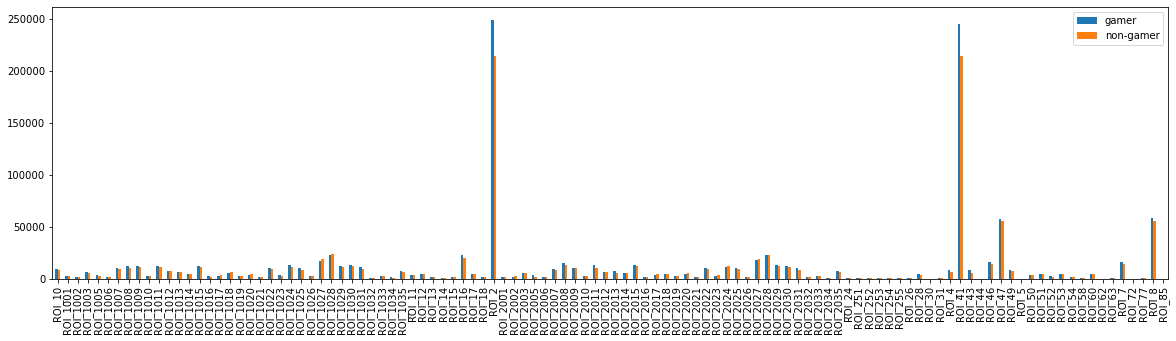

In [97]:
# visualize the results
df = pandas.DataFrame({
    "gamer": gamer_means["actual_vol"], 
    "non-gamer": nongamer_means["actual_vol"], 
})
df.plot.bar(figsize=(20,5))
#df = pandas.DataFrame([gamer_means["actual_vol"], nongamer_means["actual_vol"]], columns=['gamer', 'non-gamer'])


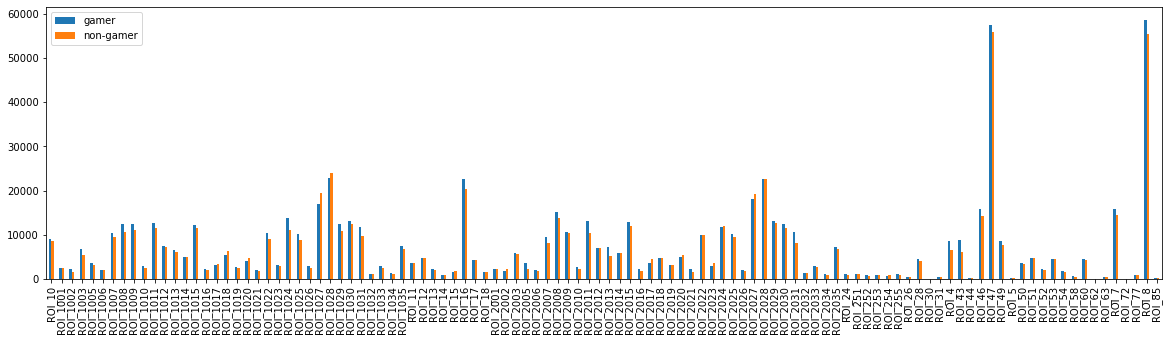

In [99]:
#remove ROI_2 and ROI_41
df[( (df.index != 'ROI_2') & (df.index != 'ROI_41') )].plot.bar(figsize=(20,5))